# Human Activity Recognition using Deep Learning

This notebook implements a deep learning-based Human Activity Recognition (HAR)
system using wearable sensor data.

## Objectives
- Use raw IMU signals for activity classification
- Apply CNN and LSTM to capture spatial and temporal patterns
- Train and evaluate the model on subject-independent splits

This notebook extends the exploratory analysis by introducing
a **CNN-LSTM based deep learning model**.


In [4]:
# ===== Cell A: Recreate 'files' after runtime restart =====

import glob
import os

print("Current directory:", os.getcwd())

# make sure we are in repo root
%cd /content/data-analysis-course-project-2025

print("Now in:", os.getcwd())
print("Contents here:", os.listdir())

# find .dat files
files = glob.glob("data/*.dat")

print("\n.dat files found:")
print(files)
print("Number of .dat files:", len(files))


Current directory: /content/data-analysis-course-project-2025
/content/data-analysis-course-project-2025
Now in: /content/data-analysis-course-project-2025
Contents here: ['.git', '.gitignore', 'README.md', 'data', 'requirements.txt', 'main.py']

.dat files found:
['data/subject108.dat', 'data/subject107.dat', 'data/subject102.dat', 'data/subject101.dat', 'data/subject105.dat', 'data/subject104.dat', 'data/subject106.dat', 'data/subject103.dat', 'data/subject109.dat']
Number of .dat files: 9


In [5]:
# ===== Cell B: Robust row-wise data loading =====

import pandas as pd
import re

columns = ["timestamp", "activity", "heart_rate"] + \
          [f"hand_{i}" for i in range(1,18)] + \
          [f"chest_{i}" for i in range(1,18)] + \
          [f"ankle_{i}" for i in range(1,18)]

EXPECTED_COLS = len(columns)
dfs = []

for f in files:
    sid = int(re.findall(r"\d+", f)[0])
    print(f"\nProcessing {f} (subject {sid})")

    # Read file using python engine (robust)
    raw = pd.read_csv(
        f,
        sep=r"\s+",
        header=None,
        engine="python",
        on_bad_lines="skip"
    )

    # Keep only rows with correct number of values
    valid = raw[raw.apply(lambda r: r.notna().sum(), axis=1) == EXPECTED_COLS]

    print(f"  Total rows read: {raw.shape[0]}")
    print(f"  Valid rows kept: {valid.shape[0]}")

    if valid.shape[0] == 0:
        print("  ❌ No valid rows found, skipping this file")
        continue

    valid.columns = columns
    valid["subject"] = sid
    dfs.append(valid)

# Combine all subjects
data = pd.concat(dfs, ignore_index=True)

print("\n✅ All files processed")
print("Final data shape:", data.shape)
data.head()



Processing data/subject108.dat (subject 108)
  Total rows read: 596813
  Valid rows kept: 53511

Processing data/subject107.dat (subject 107)


/tmp/ipython-input-568017281.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["subject"] = sid


  Total rows read: 411682
  Valid rows kept: 37210

Processing data/subject102.dat (subject 102)


/tmp/ipython-input-568017281.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["subject"] = sid


  Total rows read: 874829
  Valid rows kept: 78748

Processing data/subject101.dat (subject 101)


/tmp/ipython-input-568017281.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["subject"] = sid


  Total rows read: 614730
  Valid rows kept: 55583

Processing data/subject105.dat (subject 105)


/tmp/ipython-input-568017281.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["subject"] = sid


  Total rows read: 11
  Valid rows kept: 0
  ❌ No valid rows found, skipping this file

Processing data/subject104.dat (subject 104)
  Total rows read: 547295
  Valid rows kept: 49355

Processing data/subject106.dat (subject 106)


/tmp/ipython-input-568017281.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["subject"] = sid


  Total rows read: 510127
  Valid rows kept: 46204

Processing data/subject103.dat (subject 103)


/tmp/ipython-input-568017281.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["subject"] = sid


  Total rows read: 389361
  Valid rows kept: 35370

Processing data/subject109.dat (subject 109)


/tmp/ipython-input-568017281.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["subject"] = sid


  Total rows read: 8477
  Valid rows kept: 769


/tmp/ipython-input-568017281.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["subject"] = sid



✅ All files processed
Final data shape: (356750, 55)


,timestamp,activity,heart_rate,hand_1,hand_2,hand_3,hand_4,hand_5,hand_6,hand_7,...,ankle_9,ankle_10,ankle_11,ankle_12,ankle_13,ankle_14,ankle_15,ankle_16,ankle_17,subject
0,5.98,0.0,78,33.3125,-9.34439,-1.30878,0.982184,-9.35887,-1.46992,1.36563,...,0.036093,-0.007081,-35.5933,38.5164,-18.6181,0.547652,0.373028,0.692172,0.286051,108
1,6.09,0.0,78,33.3125,-9.49554,-1.68633,1.05817,-9.46639,-1.65043,1.30574,...,-0.036581,-0.012408,-35.5746,38.0026,-17.9083,0.548155,0.372487,0.692636,0.284665,108
2,6.20,0.0,78,33.3125,-9.53414,-1.6105,1.01885,-9.49856,-1.78622,1.20036,...,-0.008132,0.002719,-35.9535,37.8932,-17.7677,0.547971,0.372066,0.693287,0.283987,108
3,6.34,0.0,78,33.3125,-9.49876,-1.38416,0.903151,-9.2844,-1.47056,1.25985,...,-0.052226,-0.013507,-35.5808,38.5191,-17.4834,0.548052,0.372264,0.693094,0.284041,108
4,6.42,0.0,78,33.3125,-9.68102,-1.38102,1.09285,-9.51008,-1.42362,1.25998,...,-0.040921,0.012741,-35.4617,38.7699,-17.7669,0.547980,0.372035,0.693682,0.283043,108


In [6]:
# ===== Cell C: Basic cleaning & sanity checks =====

print("Shape before cleaning:", data.shape)

# 1. Remove transient / unlabeled activity
data = data[data["activity"] != 0]

# 2. Sort by subject & time (important for time-series)
data = data.sort_values(by=["subject", "timestamp"]).reset_index(drop=True)

# 3. Handle missing values
# Forward fill within each subject, then backward fill
data = (
    data.groupby("subject", group_keys=False)
        .apply(lambda df: df.ffill().bfill())
)

print("Shape after cleaning:", data.shape)

# 4. Sanity checks
print("\nUnique subjects:", sorted(data["subject"].unique()))
print("Unique activities:", sorted(data["activity"].unique()))
print("Any NaN left?:", data.isna().any().any())

data.head()

Shape before cleaning: (356750, 55)


/tmp/ipython-input-891359725.py:15: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .apply(lambda df: df.ffill().bfill())
/tmp/ipython-input-891359725.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda df: df.ffill().bfill())


Shape after cleaning: (227490, 55)

Unique subjects: [np.int64(101), np.int64(102), np.int64(103), np.int64(104), np.int64(106), np.int64(107), np.int64(108), np.int64(109)]
Unique activities: [np.float64(1.0), np.float64(2.0), np.float64(3.0), np.float64(4.0), np.float64(5.0), np.float64(6.0), np.float64(7.0), np.float64(12.0), np.float64(13.0), np.float64(16.0), np.float64(17.0), np.float64(24.0)]
Any NaN left?: False


,timestamp,activity,heart_rate,hand_1,hand_2,hand_3,hand_4,hand_5,hand_6,hand_7,...,ankle_9,ankle_10,ankle_11,ankle_12,ankle_13,ankle_14,ankle_15,ankle_16,ankle_17,subject
0,37.70,1.0,100,30.375,2.30106,7.25857,6.09259,2.2072,7.24042,5.95555,...,-0.048878,-0.006328,-60.204,-37.1225,-57.8847,1.0,0.0,0.0,0.0,101
1,37.81,1.0,100,30.375,2.24615,7.4818,5.55219,2.2513,7.40595,5.65313,...,-0.017912,0.015243,-60.782,-36.2116,-58.4891,1.0,0.0,0.0,0.0,101
2,37.92,1.0,100,30.375,2.3,7.10681,6.09309,2.34613,7.46611,6.12103,...,-0.011798,0.011387,-61.4531,-36.2983,-58.4845,1.0,0.0,0.0,0.0,101
3,38.03,1.0,100,30.375,2.49455,7.52335,6.17157,2.59106,7.76653,6.27112,...,-0.009233,0.005823,-62.0065,-36.7217,-58.3608,1.0,0.0,0.0,0.0,101
4,38.14,1.0,101,30.375,2.71654,8.30596,4.78671,2.59596,7.94641,4.86635,...,-0.042562,-0.009289,-60.4311,-37.5412,-59.0013,1.0,0.0,0.0,0.0,101


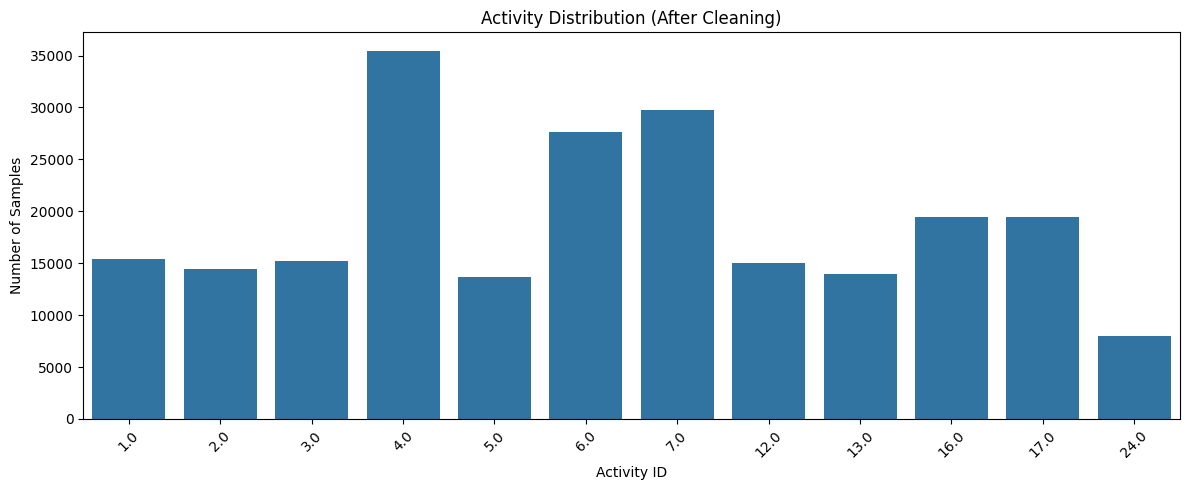

,count
activity,
1.0,15403
2.0,14427
3.0,15232
4.0,35461
5.0,13674
6.0,27655
7.0,29764
12.0,15040
13.0,13982


In [11]:
# ===== Cell D: Activity distribution plot =====

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))

activity_counts = data["activity"].value_counts().sort_index()

sns.barplot(
    x=activity_counts.index,
    y=activity_counts.values
)

plt.title("Activity Distribution (After Cleaning)")
plt.xlabel("Activity ID")
plt.ylabel("Number of Samples")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print counts for report reference
activity_counts

Using Subject 102, Activity 7.0, Samples: 1000


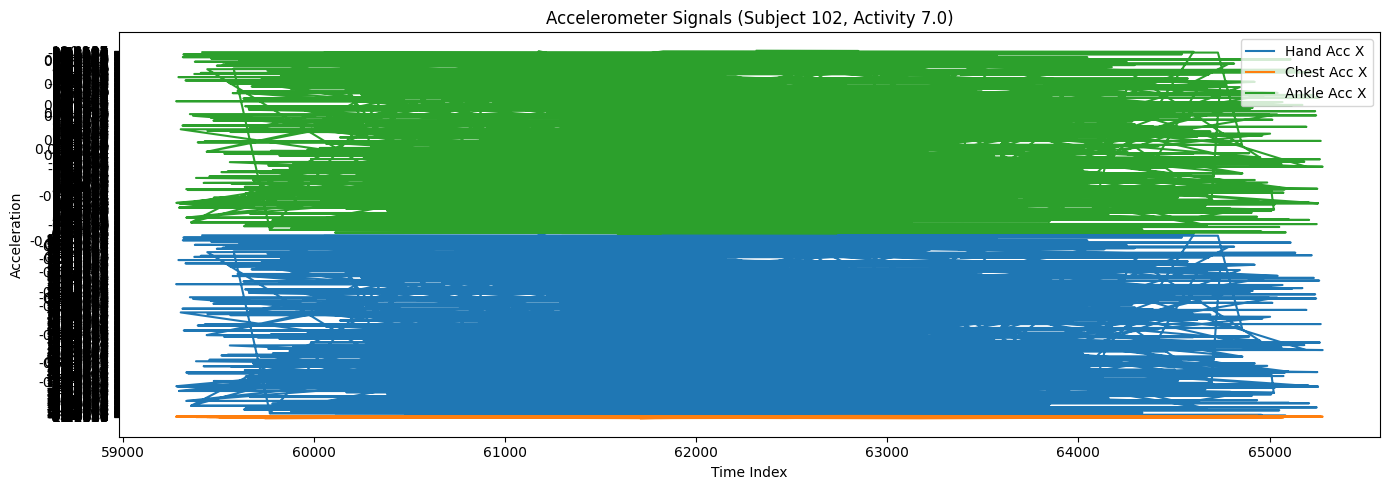

In [12]:
# ===== Cell E (Guaranteed fast sensor visualization) =====

# Step 1: Take a SMALL random subset first (very important)
small_data = data.sample(n=50000, random_state=42)

# Step 2: Pick subject & activity from this subset
example_subject = small_data["subject"].iloc[0]
example_activity = small_data["activity"].iloc[0]

# Step 3: Filter ONLY inside small subset
example = small_data[
    (small_data["subject"] == example_subject) &
    (small_data["activity"] == example_activity)
].head(1000)

print(
    f"Using Subject {example_subject}, "
    f"Activity {example_activity}, "
    f"Samples: {len(example)}"
)

# Step 4: Plot
plt.figure(figsize=(14,5))

plt.plot(example["hand_2"], label="Hand Acc X")
plt.plot(example["chest_2"], label="Chest Acc X")
plt.plot(example["ankle_2"], label="Ankle Acc X")

plt.title(
    f"Accelerometer Signals "
    f"(Subject {example_subject}, Activity {example_activity})"
)
plt.xlabel("Time Index")
plt.ylabel("Acceleration")
plt.legend()
plt.tight_layout()
plt.show()


In [13]:
# ===== Cell F: Basic statistics of sensor signals =====

sensor_cols = [
    "hand_2", "hand_3", "hand_4",
    "chest_2", "chest_3", "chest_4",
    "ankle_2", "ankle_3", "ankle_4"
]

stats = data[sensor_cols].describe().T
stats

,count,mean,std,min,25%,50%,75%,max
ankle_4,227490.0,-2.411331,4.383388,-158.83,-3.70226,-2.2281,-0.813074,97.6721


In [14]:
# ===== Cell G: Time-series windowing =====

import numpy as np

WINDOW_SIZE = 200      # 2 seconds @100Hz
STEP_SIZE = 100        # 50% overlap

feature_cols = [
    c for c in data.columns
    if c.startswith("hand_") or c.startswith("chest_") or c.startswith("ankle_")
]

X = []
y = []
subjects = []

for (subject, activity), df_sa in data.groupby(["subject", "activity"]):
    df_sa = df_sa.sort_values("timestamp")

    values = df_sa[feature_cols].values

    for start in range(0, len(values) - WINDOW_SIZE, STEP_SIZE):
        window = values[start:start + WINDOW_SIZE]

        X.append(window)
        y.append(activity)
        subjects.append(subject)

X = np.array(X)
y = np.array(y)
subjects = np.array(subjects)

print("X shape:", X.shape)   # (samples, window, features)
print("y shape:", y.shape)
print("Unique activities:", np.unique(y))

X shape: (2159, 200, 51)
y shape: (2159,)
Unique activities: [ 1.  2.  3.  4.  5.  6.  7. 12. 13. 16. 17. 24.]


In [15]:
# ===== Cell H: Subject-wise train-test split =====

from sklearn.model_selection import GroupShuffleSplit

gss = GroupShuffleSplit(
    n_splits=1,
    test_size=0.2,
    random_state=42
)

train_idx, test_idx = next(gss.split(X, y, groups=subjects))

X_train, X_test = X[train_idx], X[test_idx]
y_train, y_test = y[train_idx], y[test_idx]

subjects_train = np.unique(subjects[train_idx])
subjects_test = np.unique(subjects[test_idx])

print("Train samples:", X_train.shape)
print("Test samples:", X_test.shape)
print("Train subjects:", subjects_train)
print("Test subjects:", subjects_test)

Train samples: (1479, 200, 51)
Test samples: (680, 200, 51)
Train subjects: [101 103 104 106 108 109]
Test subjects: [102 107]


In [16]:
# ===== Cell I: Label encoding =====

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

NUM_CLASSES = len(le.classes_)

print("Encoded classes:", le.classes_)
print("Number of classes:", NUM_CLASSES)

Encoded classes: [ 1.  2.  3.  4.  5.  6.  7. 12. 13. 16. 17. 24.]
Number of classes: 12


In [17]:
# ===== Cell J.1: Device setup =====

import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

if device.type == "cuda":
    print("GPU name:", torch.cuda.get_device_name(0))

Using device: cuda
GPU name: Tesla T4


In [19]:
# ===== Cell J.2 (FIXED): Tensor conversion with dtype casting =====

# Convert to float32 explicitly
X_train_np = np.asarray(X_train, dtype=np.float32)
X_test_np  = np.asarray(X_test,  dtype=np.float32)

y_train_np = np.asarray(y_train_enc, dtype=np.int64)
y_test_np  = np.asarray(y_test_enc,  dtype=np.int64)

# Convert to torch tensors
X_train_t = torch.from_numpy(X_train_np)
X_test_t  = torch.from_numpy(X_test_np)

y_train_t = torch.from_numpy(y_train_np)
y_test_t  = torch.from_numpy(y_test_np)

print("Train tensor:", X_train_t.shape, X_train_t.dtype)
print("Test tensor:", X_test_t.shape, X_test_t.dtype)
print("Label tensor:", y_train_t.dtype)


Train tensor: torch.Size([1479, 200, 51]) torch.float32
Test tensor: torch.Size([680, 200, 51]) torch.float32
Label tensor: torch.int64


In [20]:
# ===== Cell J.3: Dataset & DataLoader =====

from torch.utils.data import TensorDataset, DataLoader

BATCH_SIZE = 64

train_ds = TensorDataset(X_train_t, y_train_t)
test_ds  = TensorDataset(X_test_t,  y_test_t)

train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True)
test_loader  = DataLoader(test_ds,  batch_size=BATCH_SIZE, shuffle=False)

print("Train batches:", len(train_loader))
print("Test batches:", len(test_loader))

Train batches: 24
Test batches: 11


In [22]:
# ===== Cell K: CNN + BiLSTM model =====

import torch.nn as nn

class CNN_BiLSTM(nn.Module):
    def __init__(self, num_classes):
        super().__init__()

        # CNN feature extractor
        self.cnn = nn.Sequential(
            nn.Conv1d(in_channels=51, out_channels=64, kernel_size=5, padding=2),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.MaxPool1d(2),

            nn.Conv1d(64, 128, kernel_size=5, padding=2),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.MaxPool1d(2)
        )

        # BiLSTM for temporal modeling
        self.lstm = nn.LSTM(
            input_size=128,
            hidden_size=128,
            num_layers=2,
            batch_first=True,
            bidirectional=True,
            dropout=0.3
        )

        # Final classifier
        self.fc = nn.Linear(128 * 2, num_classes)

    def forward(self, x):
        # x: (batch, time, features)
        x = x.permute(0, 2, 1)          # (batch, features, time)
        x = self.cnn(x)                 # CNN
        x = x.permute(0, 2, 1)          # (batch, time, channels)
        out, _ = self.lstm(x)           # LSTM
        out = out[:, -1, :]             # last timestep
        return self.fc(out)

In [23]:
# ===== Cell L.1: Model init =====

model = CNN_BiLSTM(NUM_CLASSES).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

print(model)

CNN_BiLSTM(
  (cnn): Sequential(
    (0): Conv1d(51, 64, kernel_size=(5,), stride=(1,), padding=(2,))
    (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv1d(64, 128, kernel_size=(5,), stride=(1,), padding=(2,))
    (5): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (lstm): LSTM(128, 128, num_layers=2, batch_first=True, dropout=0.3, bidirectional=True)
  (fc): Linear(in_features=256, out_features=12, bias=True)
)


In [26]:
# ===== Cell L.2: Training loop =====

EPOCHS = 30

for epoch in range(EPOCHS):
    model.train()
    total_loss = 0

    for Xb, yb in train_loader:
        Xb = Xb.to(device)
        yb = yb.to(device)

        optimizer.zero_grad()
        outputs = model(Xb)
        loss = criterion(outputs, yb)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    print(f"Epoch [{epoch+1}/{EPOCHS}] - Loss: {avg_loss:.4f}")

Epoch [1/30] - Loss: 0.0402
Epoch [2/30] - Loss: 0.0436
Epoch [3/30] - Loss: 0.1506
Epoch [4/30] - Loss: 0.1169
Epoch [5/30] - Loss: 0.1474
Epoch [6/30] - Loss: 0.0682
Epoch [7/30] - Loss: 0.0524
Epoch [8/30] - Loss: 0.1926
Epoch [9/30] - Loss: 0.2092
Epoch [10/30] - Loss: 0.0948
Epoch [11/30] - Loss: 0.0592
Epoch [12/30] - Loss: 0.0537
Epoch [13/30] - Loss: 0.0947
Epoch [14/30] - Loss: 0.0897
Epoch [15/30] - Loss: 0.1473
Epoch [16/30] - Loss: 0.0929
Epoch [17/30] - Loss: 0.0474
Epoch [18/30] - Loss: 0.0251
Epoch [19/30] - Loss: 0.0248
Epoch [20/30] - Loss: 0.0478
Epoch [21/30] - Loss: 0.1012
Epoch [22/30] - Loss: 0.0321
Epoch [23/30] - Loss: 0.0409
Epoch [24/30] - Loss: 0.0268
Epoch [25/30] - Loss: 0.1245
Epoch [26/30] - Loss: 0.0656
Epoch [27/30] - Loss: 0.0289
Epoch [28/30] - Loss: 0.0543
Epoch [29/30] - Loss: 0.0373
Epoch [30/30] - Loss: 0.0133


Test Accuracy: 0.7838235294117647

Classification Report:
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        42
         2.0       0.66      0.86      0.75        29
         3.0       1.00      0.23      0.37        44
         4.0       0.97      0.65      0.78       104
         5.0       0.86      0.89      0.87        27
         6.0       0.90      1.00      0.95       106
         7.0       1.00      0.85      0.92       110
        12.0       0.39      0.67      0.50        45
        13.0       1.00      0.26      0.41        35
        16.0       0.46      0.93      0.62        54
        17.0       0.86      1.00      0.93        50
        24.0       0.87      0.76      0.81        34

    accuracy                           0.78       680
   macro avg       0.83      0.76      0.74       680
weighted avg       0.86      0.78      0.78       680



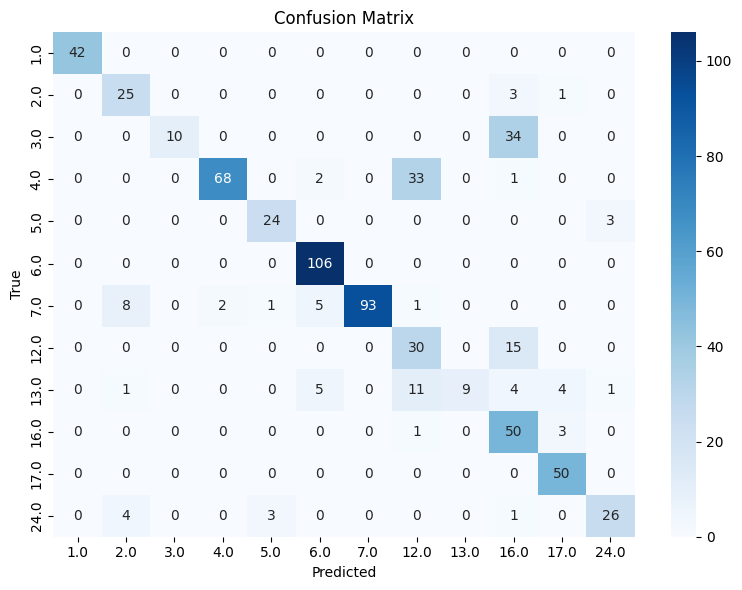

In [27]:
# ===== Cell M: Evaluation =====

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

model.eval()

all_preds = []
all_true = []

with torch.no_grad():
    for Xb, yb in test_loader:
        Xb = Xb.to(device)
        yb = yb.to(device)

        outputs = model(Xb)
        preds = torch.argmax(outputs, dim=1)

        all_preds.extend(preds.cpu().numpy())
        all_true.extend(yb.cpu().numpy())

# Accuracy
acc = accuracy_score(all_true, all_preds)
print("Test Accuracy:", acc)

# Classification report
print("\nClassification Report:")
print(classification_report(all_true, all_preds, target_names=[str(c) for c in le.classes_]))

# Confusion matrix
cm = confusion_matrix(all_true, all_preds)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

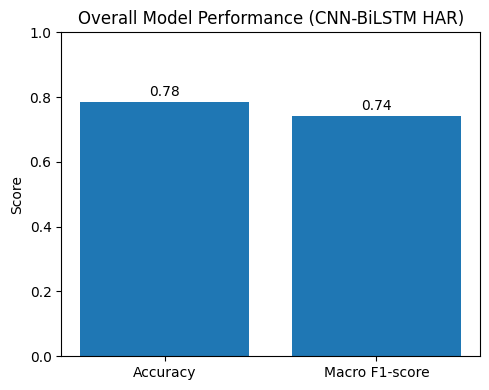

In [35]:
# ===== Overall model performance bar =====

metrics = {
    "Accuracy": acc,
    "Macro F1-score": classification_report(
        all_true, all_preds, output_dict=True
    )["macro avg"]["f1-score"]
}

plt.figure(figsize=(5,4))
plt.bar(metrics.keys(), metrics.values())
plt.ylim(0,1)

for i, v in enumerate(metrics.values()):
    plt.text(i, v+0.02, f"{v:.2f}", ha="center")

plt.title("Overall Model Performance (CNN-BiLSTM HAR)")
plt.ylabel("Score")
plt.tight_layout()
plt.show()

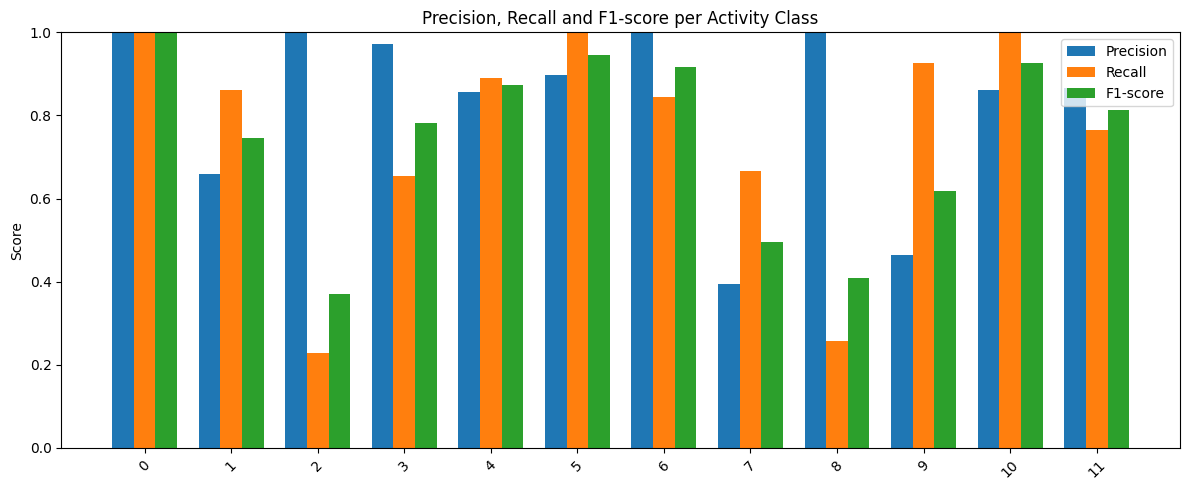

In [36]:
# ===== Per-class metric bar plot =====

report = classification_report(all_true, all_preds, output_dict=True)

classes = list(report.keys())[:-3]  # remove avg keys

precision = [report[c]["precision"] for c in classes]
recall    = [report[c]["recall"] for c in classes]
f1        = [report[c]["f1-score"] for c in classes]

x = np.arange(len(classes))
w = 0.25

plt.figure(figsize=(12,5))
plt.bar(x-w, precision, w, label="Precision")
plt.bar(x,   recall,    w, label="Recall")
plt.bar(x+w, f1,        w, label="F1-score")

plt.xticks(x, classes, rotation=45)
plt.ylim(0,1)
plt.ylabel("Score")
plt.title("Precision, Recall and F1-score per Activity Class")
plt.legend()
plt.tight_layout()
plt.show()

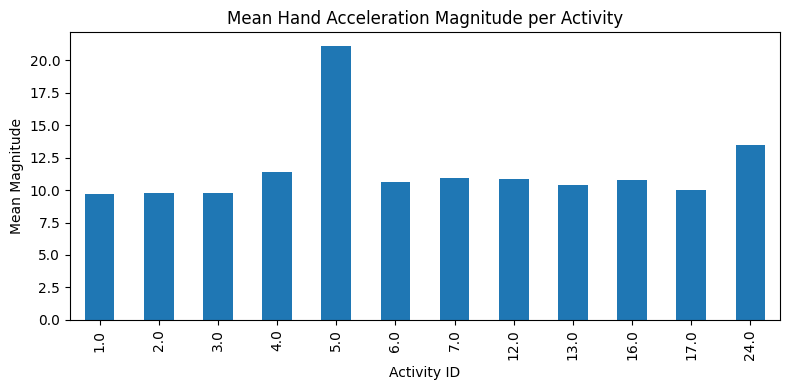

In [29]:
# ===== Activity-wise mean acceleration magnitude =====

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ensure sensor columns are numeric, coercing errors
for col in ["hand_2", "hand_3", "hand_4"]:
    data[col] = pd.to_numeric(data[col], errors='coerce')

data["hand_mag"] = np.sqrt(
    data["hand_2"]**2 + data["hand_3"]**2 + data["hand_4"]**2
)

mean_mag = data.groupby("activity")["hand_mag"].mean()

plt.figure(figsize=(8,4))
mean_mag.plot(kind="bar")
plt.title("Mean Hand Acceleration Magnitude per Activity")
plt.xlabel("Activity ID")
plt.ylabel("Mean Magnitude")
plt.tight_layout()
plt.show()

<Figure size 1000x500 with 0 Axes>

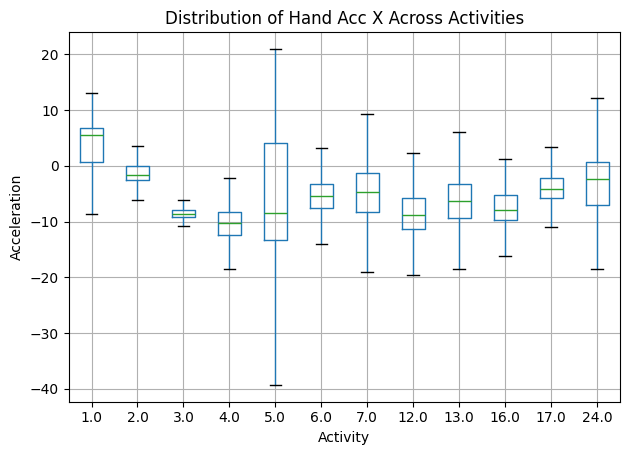

In [30]:
# ===== Boxplot of hand acceleration by activity =====

plt.figure(figsize=(10,5))
data.boxplot(column="hand_2", by="activity", showfliers=False)
plt.title("Distribution of Hand Acc X Across Activities")
plt.suptitle("")
plt.xlabel("Activity")
plt.ylabel("Acceleration")
plt.tight_layout()
plt.show()

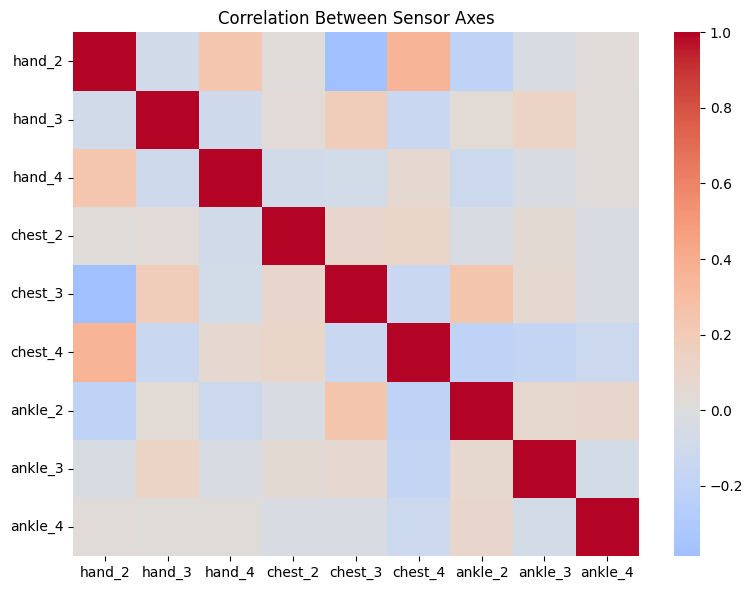

In [31]:
# ===== Correlation heatmap =====

sensor_cols = [
    "hand_2","hand_3","hand_4",
    "chest_2","chest_3","chest_4",
    "ankle_2","ankle_3","ankle_4"
]

corr = data[sensor_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Between Sensor Axes")
plt.tight_layout()
plt.show()

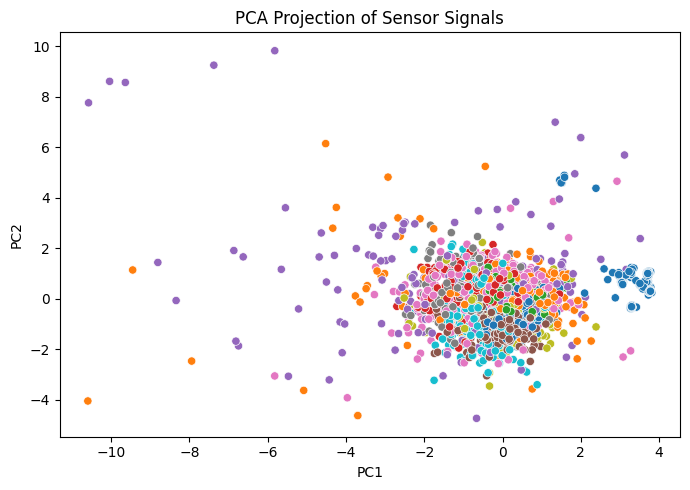

In [32]:
# ===== PCA visualization =====

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

sample = data.sample(3000, random_state=42)

X_pca = sample[sensor_cols]
y_pca = sample["activity"]

X_scaled = StandardScaler().fit_transform(X_pca)

pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_scaled)

plt.figure(figsize=(7,5))
sns.scatterplot(
    x=X_2d[:,0], y=X_2d[:,1],
    hue=y_pca, palette="tab10", legend=False
)
plt.title("PCA Projection of Sensor Signals")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.tight_layout()
plt.show()

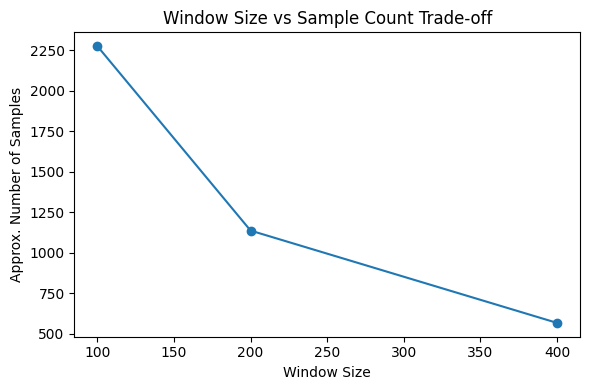

In [33]:
# ===== Window length justification =====

window_sizes = [100, 200, 400]
samples = []

for w in window_sizes:
    samples.append(len(data) // w)

plt.figure(figsize=(6,4))
plt.plot(window_sizes, samples, marker="o")
plt.xlabel("Window Size")
plt.ylabel("Approx. Number of Samples")
plt.title("Window Size vs Sample Count Trade-off")
plt.tight_layout()
plt.show()

In [37]:
!pwd
!ls

/content/data-analysis-course-project-2025
data  main.py  README.md  requirements.txt


In [40]:
%cd /content/data-analysis-course-project-2025

/content/data-analysis-course-project-2025


In [39]:
!cp /content/02_har_deep_model.ipynb .

cp: cannot stat '/content/02_har_deep_model.ipynb': No such file or directory


In [41]:
!ls /content

data-analysis-course-project-2025  sample_data
